In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1️⃣ Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Display original dataset shapes
print("Original shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Original shapes:
x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [4]:
# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [5]:
# Flatten images for Feedforward NN (32×32×3 → 3072)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


In [6]:
# Display reshaped data
print("\nAfter reshaping:")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)



After reshaping:
x_train: (50000, 3072)
x_test: (10000, 3072)


In [7]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [8]:
print("\nAfter one-hot encoding:")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



After one-hot encoding:
y_train: (50000, 10)
y_test: (10000, 10)


In [9]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [10]:
# 2️⃣ Build the Feedforward Neural Network
model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(3072,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\marta\Anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 3️⃣ Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# 4️⃣ Train the model
print("\nTraining the Feedforward Neural Network...")
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=2)



Training the Feedforward Neural Network...
Epoch 1/10
352/352 - 15s - 41ms/step - accuracy: 0.3075 - loss: 1.9321 - val_accuracy: 0.3576 - val_loss: 1.7391
Epoch 2/10
352/352 - 14s - 39ms/step - accuracy: 0.3891 - loss: 1.6940 - val_accuracy: 0.4258 - val_loss: 1.6269
Epoch 3/10
352/352 - 14s - 39ms/step - accuracy: 0.4271 - loss: 1.5976 - val_accuracy: 0.4472 - val_loss: 1.5545
Epoch 4/10
352/352 - 13s - 37ms/step - accuracy: 0.4576 - loss: 1.5254 - val_accuracy: 0.4636 - val_loss: 1.5168
Epoch 5/10
352/352 - 13s - 38ms/step - accuracy: 0.4712 - loss: 1.4829 - val_accuracy: 0.4666 - val_loss: 1.4895
Epoch 6/10
352/352 - 13s - 38ms/step - accuracy: 0.4843 - loss: 1.4415 - val_accuracy: 0.4828 - val_loss: 1.4613
Epoch 7/10
352/352 - 13s - 38ms/step - accuracy: 0.4957 - loss: 1.4113 - val_accuracy: 0.4796 - val_loss: 1.4572
Epoch 8/10
352/352 - 13s - 38ms/step - accuracy: 0.5063 - loss: 1.3830 - val_accuracy: 0.4914 - val_loss: 1.4430
Epoch 9/10
352/352 - 13s - 38ms/step - accuracy: 0.5

In [13]:
# 5️⃣ Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.5022 - loss: 1.4357

✅ Test accuracy: 0.5022


In [14]:
# 6️⃣ Predict on 10 test images
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


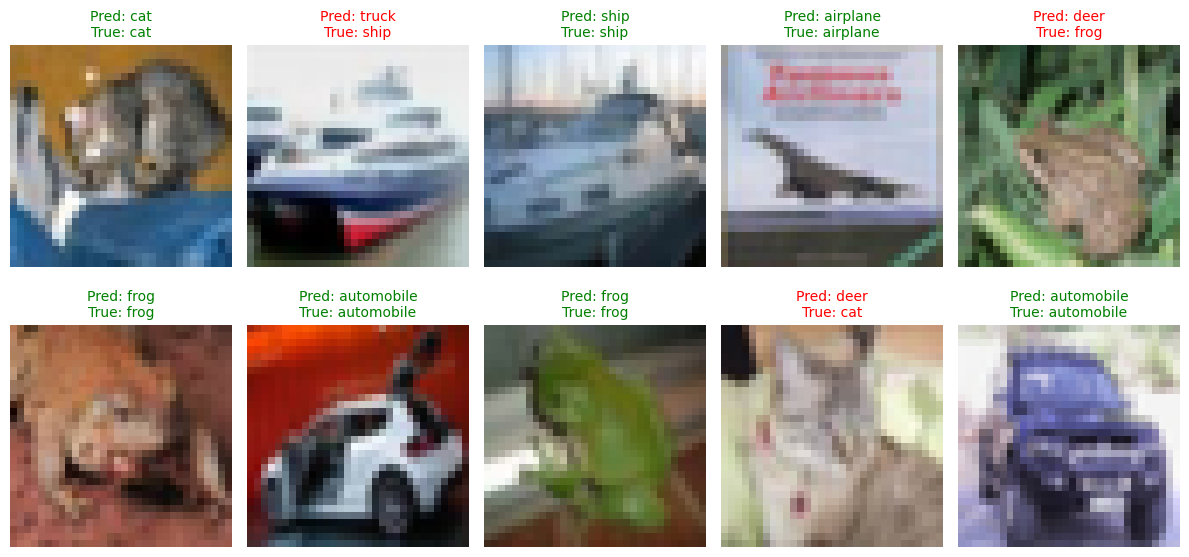

In [15]:
# 7️⃣ Display 10 test images with predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[true_labels[i]]}",
              color=color, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()